As always, load in the libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pyproj
import folium
from shapely.geometry import box
from matplotlib.colors import ListedColormap
%matplotlib inline

In [ ]:
county=gpd.read_file("https://github.com/Greg-Hallenbeck/class-datasets/raw/refs/heads/main/mapping/county_basemap.zip")
county = county.to_crs("EPSG:4326")

,cnty_fp,stt_bbv,stt_fps,cnty_nm,fps_cls,stat_nm,geometry
0,04015,AZ,04,Mohave County,H1,Arizona,"POLYGON ((-1321572.502 -873787.526, -1321334.4..."
1,12035,FL,12,Flagler County,H1,Florida,"POLYGON ((1785547.785 -1513342.301, 1804407.23..."
2,20129,KS,20,Morton County,H1,Kansas,"POLYGON ((-181692.653 -883882.267, -181677.302..."
3,28093,MS,28,Marshall County,H1,Mississippi,"POLYGON ((936765.018 -1054120.047, 944016.261 ..."
4,29510,MO,29,St. Louis city,C7,Missouri,"POLYGON ((840327.272 -662359.964, 841064.488 -..."
...,...,...,...,...,...,...,...
3137,15005,HI,15,Kalawao County,H4,Hawaii,"POLYGON ((-735194.384 -2023072.642, -733094.36..."
3138,15003,HI,15,Honolulu County,H1,Hawaii,"POLYGON ((-908340.785 -1950207.078, -905350.89..."
3139,15001,HI,15,Hawaii County,H1,Hawaii,"POLYGON ((-579021.344 -2241154.177, -578671.94..."
3140,15007,HI,15,Kauai County,H1,Hawaii,"MULTIPOLYGON (((-1112690.168 -1861292.133, -11..."


Start by checking your CRS.

In [ ]:
county.head()

,cnty_fp,stt_bbv,stt_fps,cnty_nm,fps_cls,stat_nm,geometry
0,04015,AZ,04,Mohave County,H1,Arizona,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12035,FL,12,Flagler County,H1,Florida,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20129,KS,20,Morton County,H1,Kansas,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28093,MS,28,Marshall County,H1,Mississippi,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29510,MO,29,St. Louis city,C7,Missouri,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


 Make a boundary plot with just the US.

<Axes: >

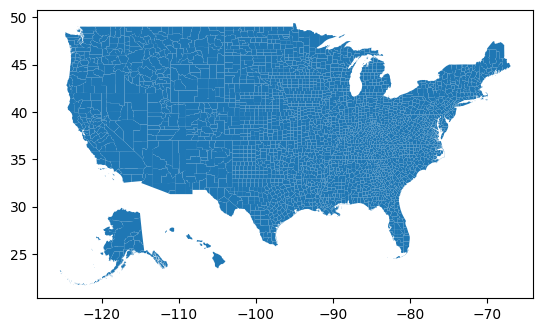

In [ ]:
county.plot()

Let's go back to our HOLC data--it's great for mapping.

A version that contains a shapefile can be found here:

In [ ]:
holc = gpd.read_file("https://github.com/Greg-Hallenbeck/class-datasets/raw/refs/heads/main/mapping/holc_ad_data.zip")
holc

,state,city,name,holc_id,holc_grade,neighborho,area_descr,geometry
0,AL,Birmingham,Mountain Brook Estates and Country Club Garden...,A1,A,244,"{ ""1c"" : ""Residents of area required to pay mo...","POLYGON ((-86.75678 33.49754, -86.75692 33.495..."
1,AL,Birmingham,"Redmont Park, Rockridge Park, Warwick Manor, a...",A2,A,193,"{ ""3n"" : ""1936 No rentals 55 No rentals N/A 50...","POLYGON ((-86.75867 33.50933, -86.76093 33.508..."
2,AL,Birmingham,"Colonial Hills, Pine Crest (outside city limits)",A3,A,206,"{ ""2c"" : ""N/A None"", ""6"" : ""A Colonial Hills, ...","POLYGON ((-86.75678 33.49754, -86.75196 33.501..."
3,AL,Birmingham,"Grove Park, Hollywood, Mayfair, and Edgewood s...",B1,B,203,"{ ""1c"" : ""Tuberculosis sanitation is not visib...","POLYGON ((-86.80111 33.48071, -86.80099 33.480..."
4,AL,Birmingham,Best section of Woodlawn Highlands,B10,B,189,"{ ""5"" : ""Both sales and rental prices in 1929 ...","POLYGON ((-86.74923 33.53333, -86.74916 33.530..."
...,...,...,...,...,...,...,...,...
8873,WV,Wheeling,None,D4,D,6518,"{ ""3c"" : ""25 25 45"", ""3a"" : ""Apts. consisting ...","POLYGON ((-80.71985 40.06376, -80.71789 40.063..."
8874,WV,Wheeling,None,D5,D,6520,"{ ""3f"" : ""50% 50% "", ""2f"" : ""None"", ""6"" : ""5 T...","POLYGON ((-80.72854 40.06729, -80.72837 40.065..."
8875,WV,Wheeling,None,D6,D,6516,"{ ""3f"" : ""40% 30%"", ""3g"" : "" None None"", ""3q""...","POLYGON ((-80.72216 40.06134, -80.72256 40.060..."
8876,WV,Wheeling,None,D7,D,6512,"{ ""2b"" : ""$600-1000"", ""3a"" : "" Singles 2-5 rm...","POLYGON ((-80.6474 40.04886, -80.64845 40.0487..."


Does this have a CRS? If not, set it and if it does, make sure it matches.

In [ ]:
holc = holc.set_crs(epsg=4326,inplace=True)
holc.crs
holc = holc.to_crs("EPSG:4326")

Plot these two together.
* Make the county a `boundary map` colored black, with a thin linewidth.
* Make the holc data colored red and big enough that we can see where it is.

<Axes: >

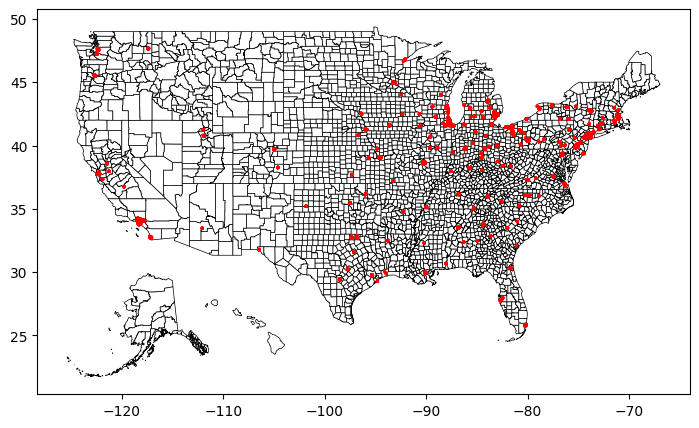

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
county.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5)
holc.plot(ax=ax, color = "red",edgecolor="red", linewidth = 2)

<Axes: >

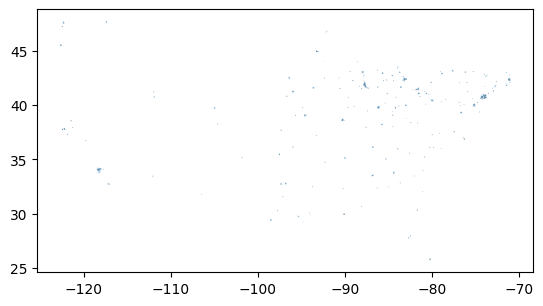

In [ ]:
holc.plot()

Let's look at Binghamton!

*Careful: it's labeled Binghamton-Johnson City in the dataset*.

If we try to do Binghamton from here (which you can) it'll be impossible to see. Zoom in on it.

In [ ]:

binghamton = holc.loc[holc.city=="Binghamton-Johnson City"]
broome = county.loc[county.cnty_nm=="Broome County"]

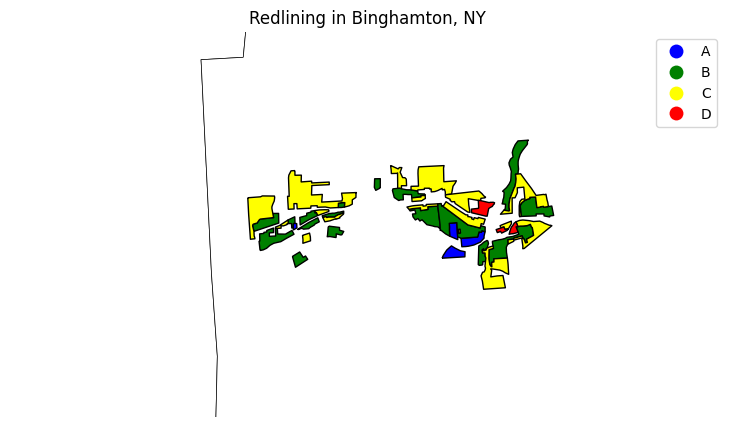

In [ ]:
order = ["red","green","blue","yellow"]

fig, ax = plt.subplots(figsize=(10,5))
county.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5)
binghamton.plot(ax=ax,edgecolor="black", linewidth = 1, column = "holc_grade",cmap = ListedColormap(["Blue","Green","Yellow","Red"]), legend = True)
plt.xlim(-76.25,-75.75)
plt.ylim(42,42.2)
plt.axis("off")
plt.title("Redlining in Binghamton, NY")
plt.show()

Well that doesn't look great--it has to do with our basemap and where the counties are.

We *can* try to New York, but it's seperated by borough so that makes things difficult. Let's try Detroit instead.

In [ ]:
`1

,state,city,name,holc_id,holc_grade,neighborho,area_descr,geometry
3651,MI,Detroit,None,A1,A,5886,"{ ""1c"" : ""Jewish 3%"", ""2o"" : "" $100 - 150"", ""1...","POLYGON ((-83.13339 42.4387, -83.13328 42.4381..."
3652,MI,Detroit,None,A10,A,5946,"{ ""1a"" : "" Slowly "", ""0"" : ""Detroit, Michigan""...","POLYGON ((-82.91227 42.37874, -82.91426 42.381..."
3653,MI,Detroit,None,A11,A,5949,"{ ""2e"" : ""100% "", ""10"" : """", ""72"" : ""17.5"", ""2...","POLYGON ((-82.90992 42.40829, -82.91063 42.406..."
3654,MI,Detroit,None,A12,A,5950,"{ ""10"" : """", ""71"" : ""8"", ""72"" : ""17.50"", ""8"" :...","POLYGON ((-82.89463 42.42049, -82.88372 42.416..."
3655,MI,Detroit,None,A13,A,5955,"{ ""3"" : "" "", ""2p"" : ""Firm "", ""1e"" : """", ""2"" :...","POLYGON ((-82.89247 42.43099, -82.89105 42.435..."
...,...,...,...,...,...,...,...,...
3884,MI,Detroit,None,D61,D,5740,"{ ""2b"" : ""Frame "", ""2a"" : ""One family 3-6 room...","POLYGON ((-83.17203 42.17044, -83.18308 42.170..."
3885,MI,Detroit,None,D62,D,5739,"{ ""4a"" : ""0"", ""2k"" : "" Firm"", ""2l"" : "" 8-20"", ...","POLYGON ((-83.18308 42.17013, -83.17203 42.170..."
3886,MI,Detroit,None,D7,D,8620,"{ ""2j"" : ""$4000-$6000 $1500-$3500"", ""1a"" : "" Y...","POLYGON ((-83.169 42.44537, -83.14961 42.44537..."
3887,MI,Detroit,None,D8,D,5832,"{ ""2a"" : "" Singles"", ""2h"" : ""25 2700-$5000"",...","POLYGON ((-83.23523 42.34302, -83.23181 42.343..."


In [ ]:
#wayne = county.loc[county.cnty_nm == "Wayne County"]
wayne = county.loc[county.stt_bbv == "MI"]
wayne

,cnty_fp,stt_bbv,stt_fps,cnty_nm,fps_cls,stat_nm,geometry
34,26005,MI,26,Allegan County,H1,Michigan,"POLYGON ((-86.26157 42.44389, -86.24971 42.480..."
35,26149,MI,26,St. Joseph County,H1,Michigan,"POLYGON ((-85.78481 41.75953, -85.78588 41.777..."
70,26025,MI,26,Calhoun County,H1,Michigan,"POLYGON ((-85.29888 42.41985, -85.07161 42.421..."
98,26133,MI,26,Osceola County,H1,Michigan,"POLYGON ((-85.56455 44.16489, -85.33478 44.165..."
112,26037,MI,26,Clinton County,H1,Michigan,"POLYGON ((-84.83689 43.11885, -84.3678 43.1179..."
...,...,...,...,...,...,...,...
3008,26141,MI,26,Presque Isle County,H1,Michigan,"POLYGON ((-84.25202 45.626, -84.21072 45.62623..."
3035,26087,MI,26,Lapeer County,H1,Michigan,"POLYGON ((-83.46071 43.23279, -83.35171 43.235..."
3043,26105,MI,26,Mason County,H1,Michigan,"POLYGON ((-86.5147 44.05812, -86.50876 44.0678..."
3059,26041,MI,26,Delta County,H1,Michigan,"MULTIPOLYGON (((-86.69239 45.61713, -86.67727 ..."


(42.0, 43.0)

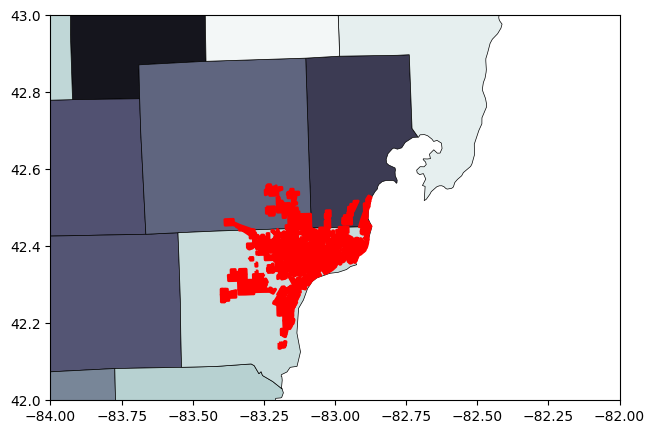

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
wayne.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5, cmap = "bone")
detroit.plot(ax=ax, color = "red",edgecolor="red", linewidth = 2)
plt.xlim(-84,-82)
plt.ylim(42,43)

We're looking at the different grades, so a single color isn't helpful. Map them by holc_grade.

Is this the best color scheme for what we're talking about?

Add a legend.

Just for fun, try it with a colormap. What colormap makes the **most** sense?

Do those colors work?

Fix them in a way that makes sense.

Set a title too, and take away the axis.

##Try Something New

Install and upload a library as `contextily as ctx`.

Then, run the following: `ctx.add_basemap(ax, crs=red_broome.crs.to_string(), source=ctx.providers.Stamen.TerrainBackground)`

In [ ]:
!pip install contextily

In [ ]:
import contextily as ctx

You're going to use this to add a new basemap to the data.

Consider where makes sense to put the code `ctx.add_basemap()`. *What needs to be passed as an argument?*

Look through some of the other [basemaps](https://contextily.readthedocs.io/en/latest/providers_deepdive.html) and add one.

You need to tell the code the source of the provider for the map, so it will be `ctx.add_basemap(ax,source=ctx.providers.NameofBasemap)`.

Warning: Stamen *no longer* works.

Let's compare the grades to the populations. This data doesn't have that, so let's return to the data we've been working with.

In [ ]:
holc_pop=pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/redlining/metro-grades.csv")

Can we map this?

Let's take just Detroit--that's going to be `Detroit-Warren-Dearborn, MI`.

We can **merge** this data into the Detroit dataframe but only if they have an column in common. Do they?

Let's talk it through. We need to

* name the new dataframe
* **merge** one dataframe with another
* pick what column they're merging **on** (the column they share)
* and **how** they merge (left)

The format will be `new_gdf=old_gdf.merge(old_gdf2, on="column", how="left")`.

Oh, that already looks good! Let's plot it with the counties and our holc coloring.

Now, we can plot some new things--like all the populations, pcts, etc. Play around with a few and make sure you add a legend and label, and a fitting color scheme.